In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1 = pd.read_csv("d1_trabalhado.csv", sep=",")

In [2]:
X = d1.drop(['G3'], axis=1)
y = d1['G3']

# Seleção de Atributos/Features

## Aplicando SelectKBest com f_regression

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

f_regression = SelectKBest(score_func=f_regression, k=8)
# k = 4 (é o número de variáveis selecionadas)

In [9]:
fit = f_regression.fit(X, y)

In [10]:
features = fit.transform(X)

In [11]:
print(features)

[[18  4  4 ...  4  5  6]
 [17  1  1 ...  3  5  5]
 [15  1  1 ...  2  7  8]
 ...
 [21  1  1 ...  3 10  8]
 [18  3  2 ...  1 11 12]
 [19  1  1 ...  3  8  9]]


In [12]:
cols = fit.get_support(indices=True)
d1.iloc[:, cols]

,age,Medu,Fedu,failures,higher,goout,G1,G2
0,18,4,4,0,1,4,5,6
1,17,1,1,0,1,3,5,5
2,15,1,1,3,1,2,7,8
3,15,4,2,0,1,2,15,14
4,16,3,3,0,1,2,6,10
...,...,...,...,...,...,...,...,...
390,20,2,2,2,1,4,9,9
391,17,3,1,0,1,5,14,16
392,21,1,1,3,1,3,10,8
393,18,3,2,0,1,1,11,12


## Aplicando o recursive feature elimination - RFE
Em modelos com grande número de features pode ser inviável

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [4]:
model = LogisticRegression(solver='saga', max_iter=5000)
rfe = RFE(model, n_features_to_select=6, step=2)

In [22]:
fit = rfe.fit(X,y)

In [23]:
print("Número de features: {}".format(fit.n_features_))

Número de features: 6


In [24]:
cols = fit.get_support(indices=True)
d1.iloc[:, cols]

,age,failures,health,absences,G1,G2
0,18,0,3,6,5,6
1,17,0,3,4,5,5
2,15,3,3,10,7,8
3,15,0,5,2,15,14
4,16,0,5,4,6,10
...,...,...,...,...,...,...
390,20,2,4,11,9,9
391,17,0,2,3,14,16
392,21,3,3,3,10,8
393,18,0,5,0,11,12


## Utilizando RandomForest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X,y)

RandomForestRegressor(n_estimators=10)

In [27]:
print(model.feature_importances_)

[3.74405329e-04 1.52346541e-02 3.30614582e-04 5.89131853e-04
 1.77122080e-04 2.02648157e-03 4.20100913e-03 2.02905903e-03
 2.48313959e-03 5.04306712e-03 1.67948200e-03 4.80455329e-04
 4.20743778e-03 2.43597916e-03 3.29279697e-03 0.00000000e+00
 2.64377041e-04 3.50171594e-04 1.14223169e-02 5.11248513e-03
 1.84323386e-03 4.97772086e-04 2.67298803e-03 1.02796439e-02
 1.12164044e-01 3.38182650e-03 7.73834566e-01 2.33535592e-03
 2.36471173e-04 2.21572134e-03 7.07381430e-03 3.35744284e-04
 1.14560766e-03 2.92722955e-03 3.29545471e-03 7.48733087e-04
 2.40208615e-04 1.13538778e-03 7.37207606e-03 1.20630448e-03
 6.44758711e-04 2.00072608e-03 3.33576796e-04 3.44568356e-04]


In [28]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns = ['importance']).sort_values('importance',
                                   ascending=False)

In [29]:
feature_importances

,importance
G2,0.773835
absences,0.112164
age,0.015235
famrel,0.011422
health,0.010280
reason_home,0.007372
Mjob_services,0.007074
freetime,0.005112
failures,0.005043
paid,0.004207


<AxesSubplot:>

<Figure size 2000x800 with 0 Axes>

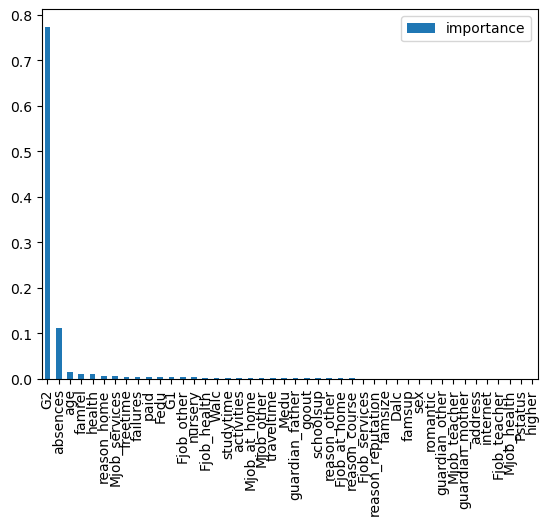

In [47]:
plt.figure(figsize=(20, 8))
feature_importances.plot(kind='bar')

## Remoção de dados com baixa variância
- não contribuem significativamente para a capacidade

In [38]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.15)
selector.fit(X)

features_selecionadas = X.columns[selector.get_support()]
features_removidas = X.columns[~selector.get_support()]

print("Features selecionadas:", features_selecionadas)
print("Features removidas:", features_removidas)

Features selecionadas: Index(['sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'failures', 'famsup', 'paid', 'activities', 'nursery',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'Mjob_other', 'Mjob_services', 'Fjob_other',
       'Fjob_services', 'reason_course', 'reason_home', 'reason_reputation',
       'guardian_father', 'guardian_mother'],
      dtype='object')
Features removidas: Index(['Pstatus', 'schoolsup', 'higher', 'internet', 'Mjob_at_home',
       'Mjob_health', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_teacher', 'reason_other', 'guardian_other'],
      dtype='object')


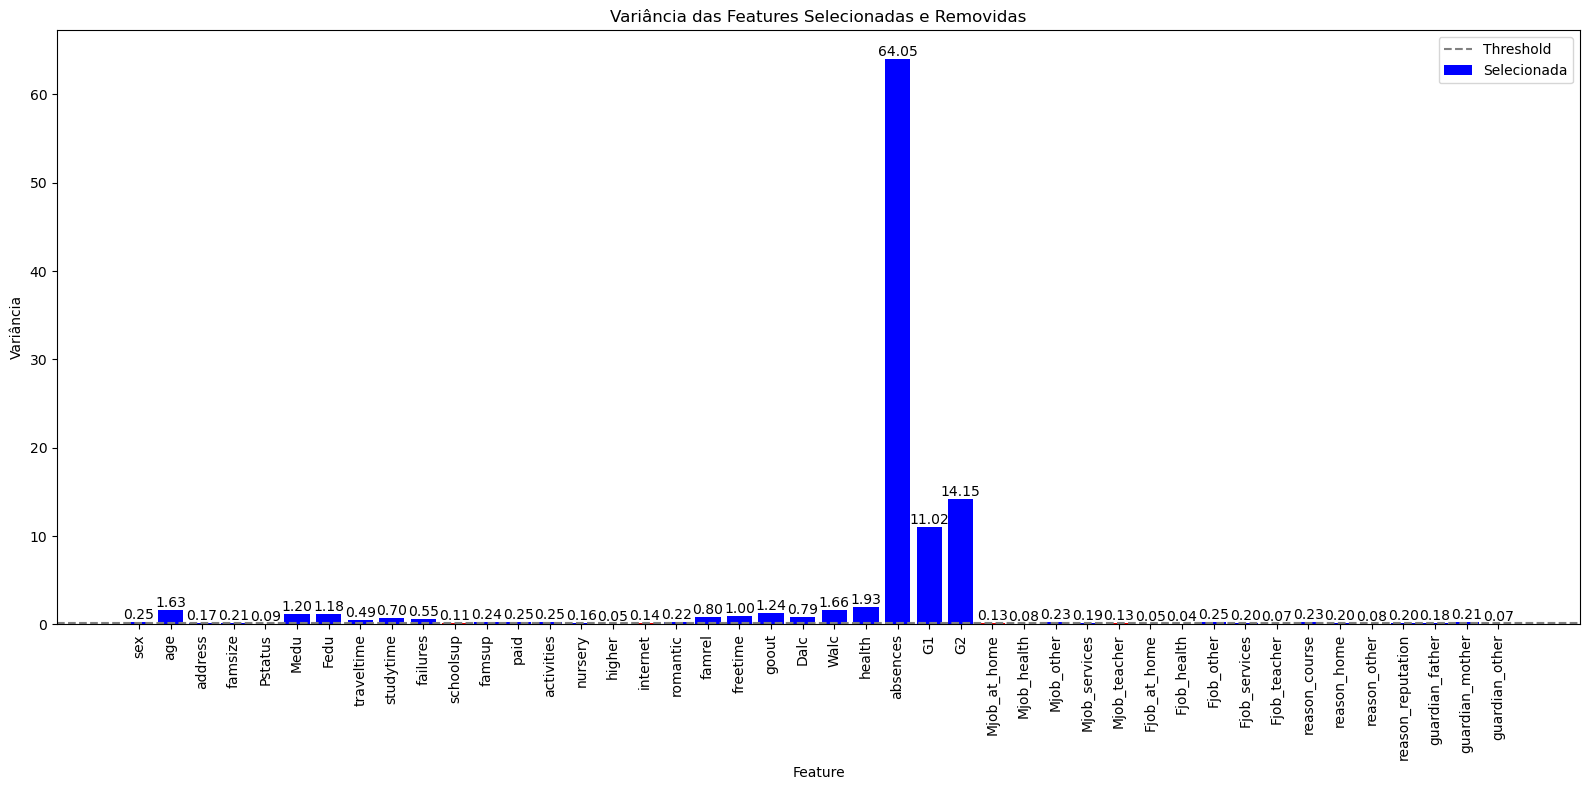

In [49]:
# criando gráfico
variances = X.var()

data = {
    'Feature': X.columns,
    'Variance': variances
}
df_variance = pd.DataFrame(data)

df_variance['Status'] = df_variance['Feature'].apply(lambda x: 'Selecionada' if x in features_selecionadas else 'Removida')

# Plotar
plt.figure(figsize=(16, 8))
bars = plt.bar(df_variance['Feature'], df_variance['Variance'], color=df_variance['Status'].map({'Selecionada': 'blue', 'Removida': 'red'}))
plt.xlabel('Feature')
plt.ylabel('Variância')
plt.title('Variância das Features Selecionadas e Removidas')

plt.axhline(y=0.15, color='gray', linestyle='--', label='Threshold')
plt.legend(['Threshold', 'Selecionada', 'Removida'])
plt.xticks(rotation=90) 

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Utilizando decision tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=0)

In [51]:
clf = clf.fit(X,y)

In [52]:
clf.feature_importances_

array([7.19475885e-04, 2.36709246e-02, 7.65828674e-04, 4.86377110e-04,
       6.04601584e-05, 5.59400418e-04, 6.46776723e-04, 1.71665959e-03,
       1.12443493e-02, 6.85845568e-03, 2.19671909e-04, 0.00000000e+00,
       0.00000000e+00, 3.32530871e-04, 5.81553551e-03, 0.00000000e+00,
       0.00000000e+00, 1.71303782e-04, 1.29833213e-02, 3.98294129e-04,
       8.36679433e-04, 4.16311377e-04, 1.02994697e-03, 5.20897854e-03,
       1.33896478e-01, 7.70188078e-03, 7.58286880e-01, 6.74955223e-04,
       1.36035356e-04, 4.37747251e-04, 8.85309463e-05, 2.35362760e-04,
       0.00000000e+00, 7.76577146e-04, 8.47118195e-04, 3.95006368e-04,
       1.91457168e-04, 2.02339997e-02, 1.63242428e-04, 1.08828285e-04,
       6.95680590e-04, 1.17256065e-04, 7.85694154e-04, 8.59877809e-05])

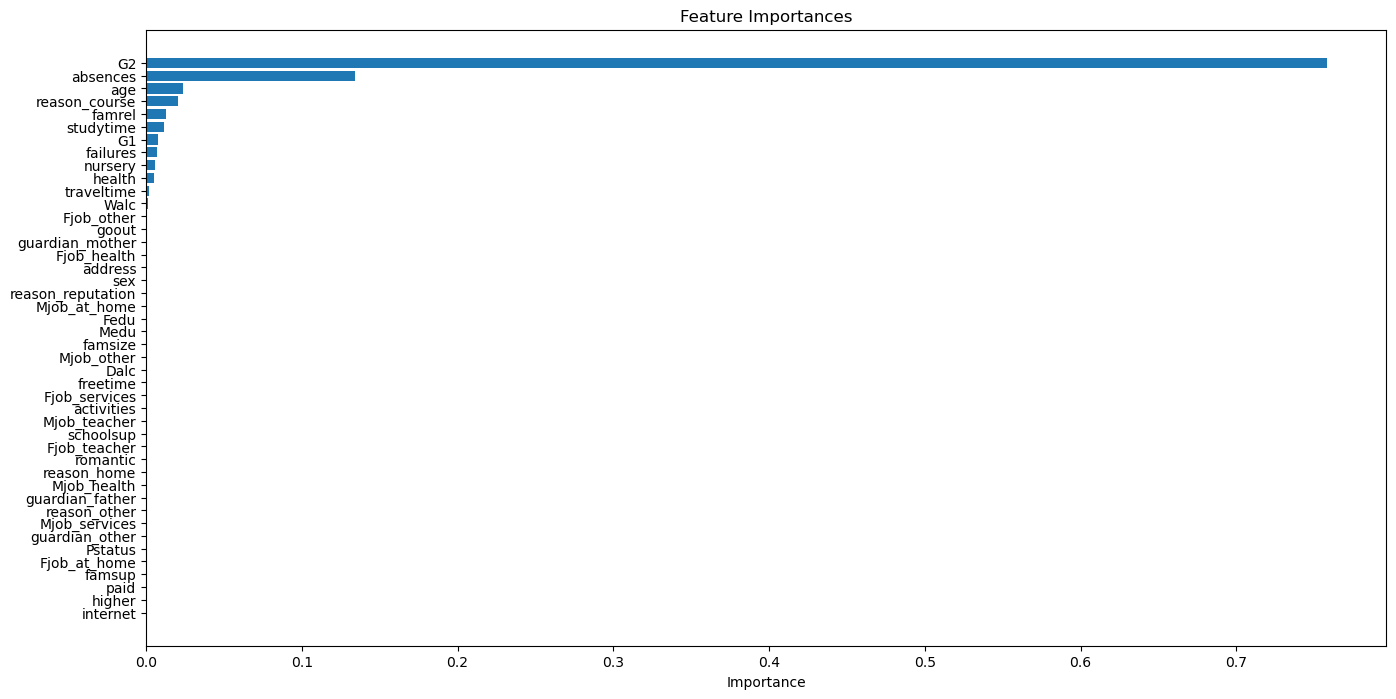

In [56]:
feature_names = X.columns
importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(16, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Utilizando SelectFromModel


In [57]:
from sklearn.feature_selection import SelectFromModel

In [58]:
estimator = DecisionTreeRegressor(random_state=0)

In [59]:
seletor = SelectFromModel(estimator, threshold=0, max_features=6)
seletor = seletor.fit(X,y)

In [60]:
seletor.get_feature_names_out()

array(['age', 'studytime', 'famrel', 'absences', 'G2', 'reason_course'],
      dtype=object)

# Aplicando conceito de multicolinearidade
A multicolinearidade é uma situação em que duas ou mais variáveis independentes em um modelo de regressão encontram-se altamente correlacionadas.
Essa alta correlação pode afetar a qualidade dos resultados do modelo e dificultar a interpretação dos resultados.

In [20]:
# Identificando pares de features com alta correlação
corr_matrix = X.corr().abs()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.8: 
            high_corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

high_corr_pairs_df = pd.DataFrame(high_corr_pairs)
print(high_corr_pairs_df)

          Feature1         Feature2  Correlation
0               G1               G2     0.852118
1  guardian_father  guardian_mother     0.812592


- G1 e G2, como já observamos anteriormente, tem alta correlação entre si. O mesmo ocorre com guardian_father e guardian_mother. 

In [22]:
# Calculando o VIF para cada feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

              Feature       VIF
0               const  0.000000
1                 sex  1.482668
2                 age  1.581112
3             address  1.329266
4             famsize  1.148858
5             Pstatus  1.145245
6                Medu  2.939984
7                Fedu  2.135871
8          traveltime  1.273016
9           studytime  1.387297
10           failures  1.562406
11          schoolsup  1.253899
12             famsup  1.289761
13               paid  1.336615
14         activities  1.145489
15            nursery  1.145340
16             higher  1.300130
17           internet  1.255850
18           romantic  1.173153
19             famrel  1.134204
20           freetime  1.312836
21              goout  1.495700
22               Dalc  2.027806
23               Walc  2.382023
24             health  1.177964
25           absences  1.230067
26                 G1  4.669615
27                 G2  4.403667
28       Mjob_at_home       inf
29        Mjob_health       inf
30      

C:\Users\Bianca\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Bianca\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Excluindo G2 e G1 da seleção de variáveis

In [23]:
X = d1.drop(['G3', 'G2', 'G1'], axis=1)
y = d1['G3']

#### Aplicando SelectKBest com f_regression

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

f_regression = SelectKBest(score_func=f_regression, k=6)
fit = f_regression.fit(X, y)
features = fit.transform(X)
print(features)

cols = fit.get_support(indices=True)
d1.iloc[:, cols]

[[18  4  4  0  1  4]
 [17  1  1  0  1  3]
 [15  1  1  3  1  2]
 ...
 [21  1  1  3  1  3]
 [18  3  2  0  1  1]
 [19  1  1  0  1  3]]


,age,Medu,Fedu,failures,higher,goout
0,18,4,4,0,1,4
1,17,1,1,0,1,3
2,15,1,1,3,1,2
3,15,4,2,0,1,2
4,16,3,3,0,1,2
...,...,...,...,...,...,...
390,20,2,2,2,1,4
391,17,3,1,0,1,5
392,21,1,1,3,1,3
393,18,3,2,0,1,1


#### Aplicando o recursive feature elimination - RFE

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='saga', max_iter=5000)
rfe = RFE(model, n_features_to_select=6, step=2)

fit = rfe.fit(X,y)

print("Número de features: {}".format(fit.n_features_))

cols = fit.get_support(indices=True)
d1.iloc[:, cols]

Número de features: 6


,address,failures,schoolsup,romantic,Mjob_at_home,Fjob_at_home
0,1,0,1,0,1,0
1,1,0,0,0,1,0
2,1,3,1,0,1,0
3,1,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
390,1,2,0,0,0,0
391,1,0,0,0,0,0
392,0,3,0,0,0,0
393,0,0,0,0,0,0


#### Utilizando RandomForest¶

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(X,y)
print(model.feature_importances_)
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns = ['importance']).sort_values('importance',
                                   ascending=False)
feature_importances

[0.02070628 0.04839145 0.00845641 0.01245317 0.00865827 0.02851147
 0.0238052  0.02217673 0.03552016 0.10585426 0.03170852 0.01414238
 0.01001384 0.01444938 0.01831522 0.02124872 0.01903332 0.016
 0.02758742 0.04450447 0.06604344 0.01173164 0.02789756 0.04805669
 0.16147577 0.01884064 0.00739414 0.01305469 0.01632058 0.00561892
 0.01017382 0.00092317 0.00895099 0.00331182 0.00874884 0.00705717
 0.00656189 0.00523132 0.00538504 0.01109266 0.00370661 0.02088594]


,importance
absences,0.161476
failures,0.105854
goout,0.066043
age,0.048391
health,0.048057
freetime,0.044504
studytime,0.035520
schoolsup,0.031709
Medu,0.028511
Walc,0.027898


<AxesSubplot:>

<Figure size 2000x800 with 0 Axes>

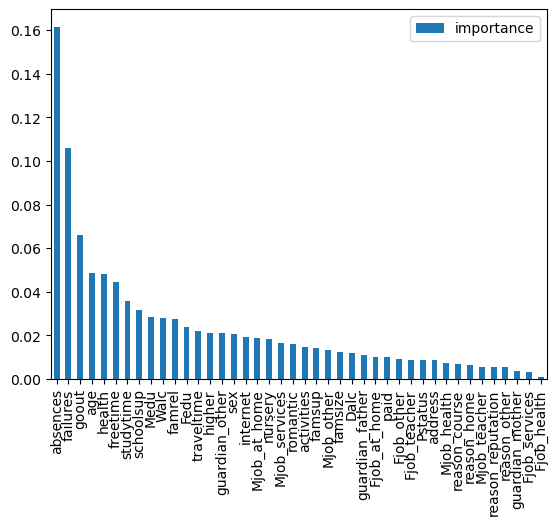

In [31]:
plt.figure(figsize=(20, 8))
feature_importances.plot(kind='bar')

#### Utilizando decision tree

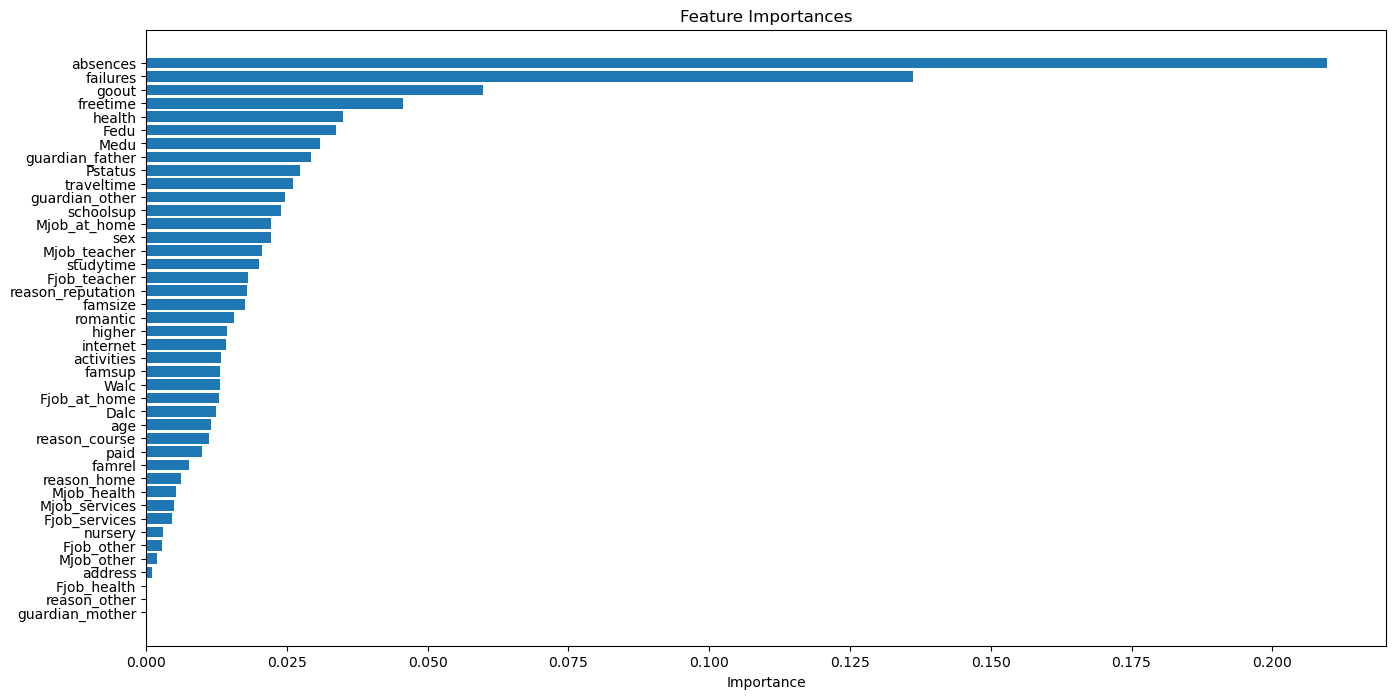

In [33]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=0)

clf = clf.fit(X,y)

clf.feature_importances_

feature_names = X.columns
importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(16, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#### Utilizando SelectFromModel

In [34]:
from sklearn.feature_selection import SelectFromModel
estimator = DecisionTreeRegressor(random_state=0)
seletor = SelectFromModel(estimator, threshold=0, max_features=6)
seletor = seletor.fit(X,y)
seletor.get_feature_names_out()

array(['Fedu', 'failures', 'freetime', 'goout', 'health', 'absences'],
      dtype=object)

# Conclusões: